In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("trabalho.csv")
df['order_date'] = pd.to_datetime(df['order_date'])



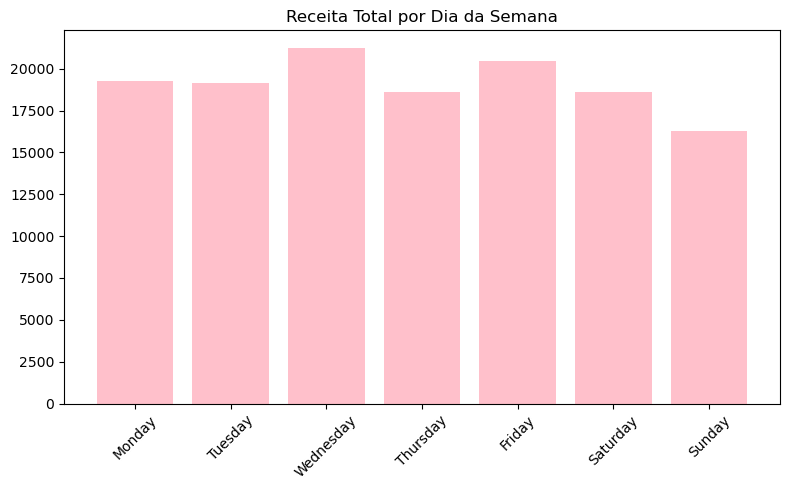

In [35]:
df['total_revenue'] = df['quantity'] * df['price']
df['order_date'] = pd.to_datetime(df['order_date'])
df['weekday'] = df['order_date'].dt.day_name()

weekday_revenue = df.groupby('weekday')['total_revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(weekday_revenue['weekday'], weekday_revenue['total_revenue'], color='pink')
plt.title('Receita Total por Dia da Semana')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



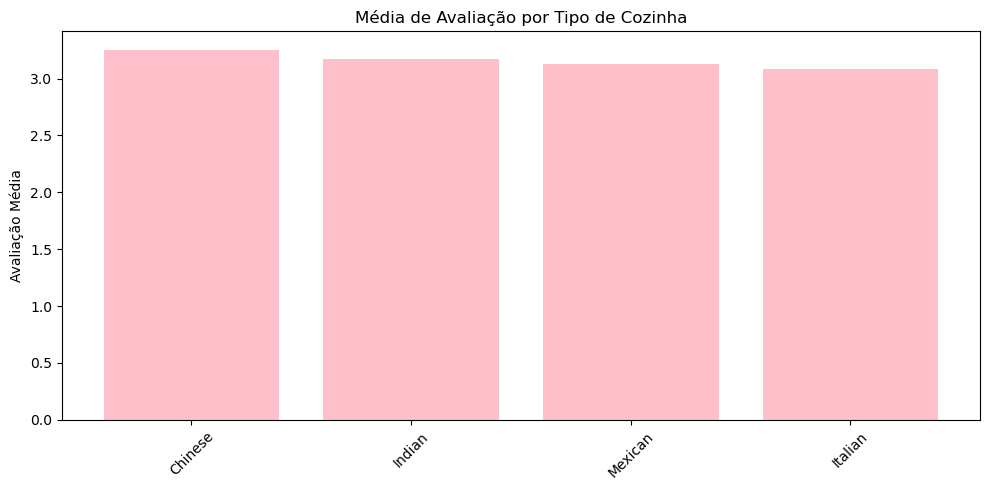

In [36]:
cuisine_rating = df.groupby('cuisine')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(cuisine_rating['cuisine'], cuisine_rating['rating'], color='pink')
plt.title('Média de Avaliação por Tipo de Cozinha')
plt.xticks(rotation=45)
plt.ylabel('Avaliação Média')
plt.tight_layout()
plt.show()


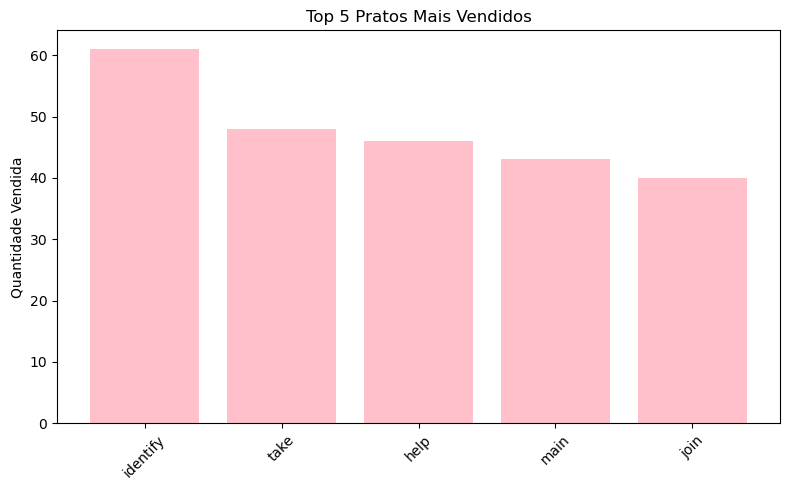

In [34]:
top_dishes = df.groupby('dish_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False).head(5)

plt.figure(figsize=(8,5))
plt.bar(top_dishes['dish_name'], top_dishes['quantity'], color='pink')
plt.title('Top 5 Pratos Mais Vendidos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


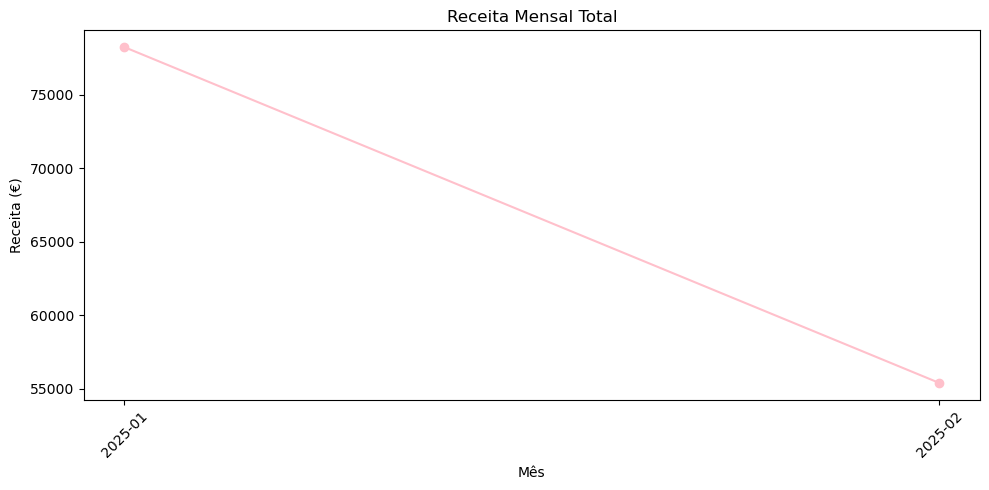

In [33]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.to_period('M').astype(str)

monthly_revenue = df.groupby('month')['total_revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['month'], monthly_revenue['total_revenue'], marker='o', linestyle='-', color='pink')
plt.title('Receita Mensal Total')
plt.xlabel('Mês')
plt.ylabel('Receita (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


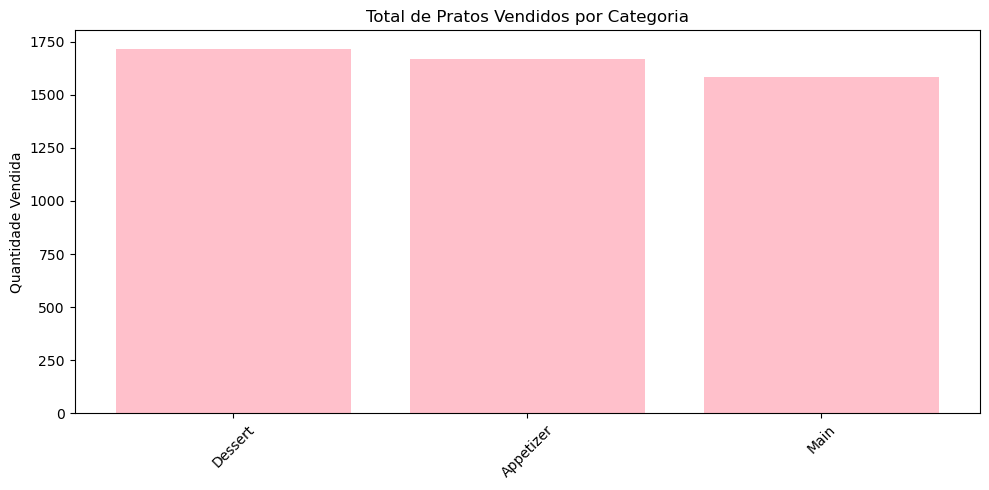

In [32]:
category_sales = df.groupby('category')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(category_sales['category'], category_sales['quantity'], color='pink')
plt.title('Total de Pratos Vendidos por Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


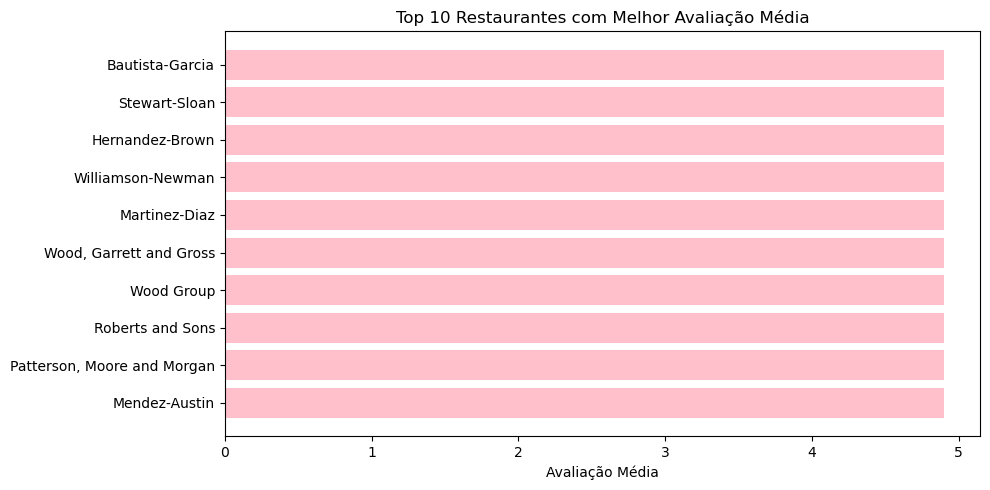

In [31]:
restaurant_rating = df.groupby('restaurant_name')['rating'].mean().reset_index().sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(restaurant_rating['restaurant_name'], restaurant_rating['rating'], color='pink')
plt.title('Top 10 Restaurantes com Melhor Avaliação Média')
plt.xlabel('Avaliação Média')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


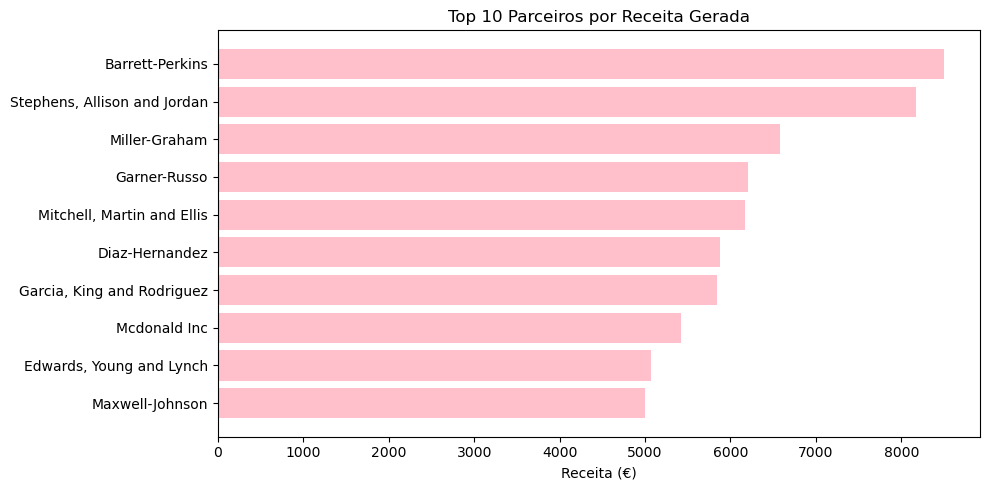

In [38]:
partner_revenue = df.groupby('partner_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(partner_revenue['partner_name'], partner_revenue['total_revenue'], color='pink')
plt.title('Top 10 Parceiros por Receita Gerada')
plt.xlabel('Receita (€)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


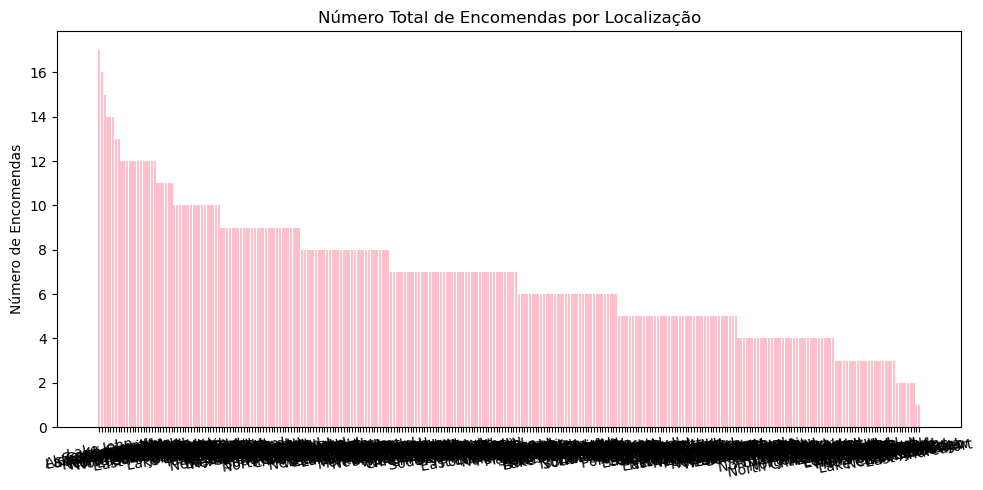

In [43]:
location_orders = df['location'].value_counts().reset_index()
location_orders.columns = ['location', 'order_count']

plt.figure(figsize=(10,5))
plt.bar(location_orders['location'], location_orders['order_count'], color='pink')
plt.title('Número Total de Encomendas por Localização')
plt.ylabel('Número de Encomendas')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()
